<a href="https://colab.research.google.com/github/ninavergara605/dimension_analysis/blob/development/variation_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

from sklearn.linear_model import LinearRegression
from scipy import ndimage
from skimage import color
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### The Variation Method

In [ ]:
def find_dx(x, x_size):
  N = np.arange(x_size-1)
  sup, inf = np.zeros(x_size), np.zeros(x_size)
  for n in N:
    current_values = [x[n], x[n+1]]
    sup[n], inf[n] = max(current_values), min(current_values)
  dx = sup - inf
  return dx

def variation_method(x):
  x_size = len(x)
  dx = find_dx(x, x_size)
  
  E = np.arange(1,70)
  Ve = np.zeros(len(E))
  for e in E:
    target_lengths = dx[dx < e]
    Ve[e-1] = sum(target_lengths) * (1/x_size)
  
  X = np.log(1/E)
  y = np.log((1/E**2)* Ve)
  return X, y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


ValueError: ignored

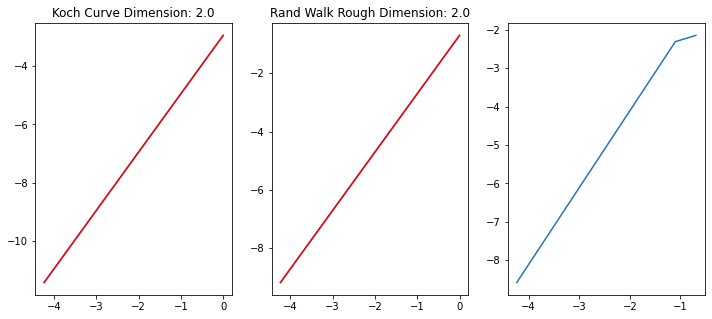

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12,5))
for ax, (tag, points) in zip(axes, data.items()):
  X, y = variation_method(points[:,1])
  ax.plot(X, y)
  dimension = plot_regression_line(ax, X, y, tag=tag)
  